# 💼 Importing Libraries

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [66]:
train = pd.read_csv('train.csv')
train = train.iloc[:,1:]

In [67]:
Y = train.Personality
train = train.iloc[:,:-1]
train

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,No,6.0,4.0,No,15.0,5.0
1,1.0,No,7.0,3.0,No,10.0,8.0
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0
3,3.0,No,7.0,3.0,No,11.0,5.0
4,1.0,No,4.0,4.0,No,13.0,NaN
...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0
18520,1.0,NaN,6.0,7.0,No,6.0,5.0
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN
18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0


In [69]:
train.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


# 🧹 Data Cleaning

In [68]:
train.isnull().sum()

Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
dtype: int64

In [36]:
le = LabelEncoder()
train['Stage_fear'] = le.fit_transform(train.Stage_fear)
train['Drained_after_socializing'] =le.fit_transform(train.Drained_after_socializing)
test['Stage_fear'] = le.fit_transform(test.Stage_fear)
test['Drained_after_socializing'] =le.fit_transform(test.Drained_after_socializing)

In [37]:
new = ColumnTransformer(
    transformers = [
        ("trf1", KNNImputer(n_neighbors=10), ["Time_spent_Alone","Social_event_attendance","Going_outside",
                                                  "Friends_circle_size","Post_frequency","Stage_fear","Drained_after_socializing"]), 
    ],
    remainder = "passthrough"
)

In [38]:
train = new.fit_transform(train)
train = pd.DataFrame(train)
test = new.fit_transform(test)
test = pd.DataFrame(test)
train

,0,1,2,3,4,5,6
0,0.0,6.0,4.0,15.0,5.0,0.0,0.0
1,1.0,7.0,3.0,10.0,8.0,0.0,0.0
2,6.0,1.0,0.0,3.0,0.0,1.0,2.0
3,3.0,7.0,3.0,11.0,5.0,0.0,0.0
4,1.0,4.0,4.0,13.0,6.1,0.0,0.0
...,...,...,...,...,...,...,...
18519,3.0,7.0,3.0,9.0,7.0,0.0,0.0
18520,1.0,6.0,7.0,6.0,5.0,2.0,0.0
18521,7.0,1.0,1.0,1.0,1.0,1.0,1.0
18522,6.9,1.0,0.0,5.0,2.0,1.0,1.0


<Axes: xlabel='0', ylabel='1'>

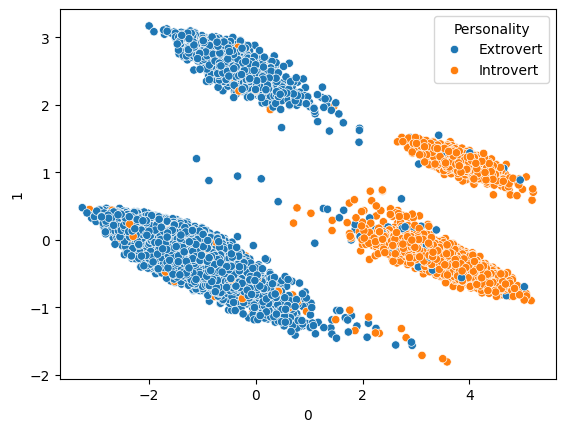

In [39]:
pca = PCA(n_components=2)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train)
X_pca = pca.fit_transform(X_scaled)
x_pca = pd.DataFrame(X_pca)
sns.scatterplot(x=x_pca[0],y=x_pca[1],hue=Y)

### Logistic Regression Model


In [41]:
logicstic = LogisticRegression()
cross_val_score(logicstic,train,Y,cv=10).mean()

0.9689589819322817

### 👥 Kneighbors Classifer Model


In [40]:
kneighbor = KNeighborsClassifier(n_neighbors=37)
cross_val_score(kneighbor,train,Y,cv=10).mean()


0.9686891492285582

### 🌳 Decision Tree Classifier


In [42]:
decisiontree = DecisionTreeClassifier()
cross_val_score(decisiontree,train,Y,cv=10).mean()

0.9336531210260869

### 📈 Support Vector Machine (SVM) Model


In [43]:
svm = SVC()
cross_val_score(svm,train,Y,cv=10).mean()

0.9688510779903933

# 🗳️ Voting Classifier Model


In [44]:
logistic = LogisticRegression()  
kneighbor = KNeighborsClassifier()  
decisiontree = DecisionTreeClassifier()
svm = SVC()  

estimators = [('lg', logistic), ('kn', kneighbor), ('dt', decisiontree), ('svm', svm)]

vc = VotingClassifier(estimators=estimators)
vc.fit(train, Y)
cross_val_score(vc, train, Y, cv=10).mean()

0.9684732247863777

# 🌲 Random Forest Classifier


In [47]:
params = {
    'n_estimators':[5,10,15,20,25,30,35,40],
    'max_depth':[4,5,6,7,8,9,10],
    'max_samples':[0.2,0.3,0.4,0.5,0.6,0.7],
    'max_features':[0.2,0.3,0.4,0.5],
}
RF = GridSearchCV(
    RandomForestClassifier(),
    param_grid = params,
    cv = 5,
    n_jobs=-1
)

In [48]:
RF.fit(train,Y)


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [4, 5, ...], 'max_features': [0.2, 0.3, ...], 'max_samples': [0.2, 0.3, ...], 'n_estimators': [5, 10, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,25


In [49]:
RF.best_score_

0.9693373615131033

In [50]:
RF.best_params_

{'max_depth': 7, 'max_features': 0.2, 'max_samples': 0.6, 'n_estimators': 25}

In [63]:
randomforest = RandomForestClassifier(max_depth = 7,max_features = 0.2, max_samples = 0.6, n_estimators = 15)
cross_val_score(randomforest,train,Y,cv=10).mean()


0.9688510488507924

# 💉 Ada Boost Model


In [52]:
params = {
    'n_estimators':[25,50,100,200],
    'learning_rate':[0.01,0.1,1]
}
AD = GridSearchCV(
    AdaBoostClassifier(),
    param_grid = params,
    cv = 5,
    n_jobs=-1
)

In [53]:
AD.fit(train,Y)

,estimator,AdaBoostClassifier()
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'n_estimators': [25, 50, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [54]:
AD.best_score_

0.9691214225129196

In [55]:
AD.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [62]:
adaboost = AdaBoostClassifier(learning_rate = 1,n_estimators = 100)
cross_val_score(adaboost,train,Y,cv=10).mean()

0.969067002432574

# 🚀 Gradient Boosting Model


In [57]:
params = {
    "loss" : ['log_loss','exponential'],
    "learning_rate": [0.01,0.01,0.1,1],
    "n_estimators"  : [5,10,15,20,25,50,100,200],   
    "max_leaf_nodes" : [2,4,6,10,12]
}
GD = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid = params,
    cv = 5,
    n_jobs=-1
)

In [58]:
GD.fit(train,Y)

,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.01, 0.01, ...], 'loss': ['log_loss', 'exponential'], 'max_leaf_nodes': [2, 4, ...], 'n_estimators': [5, 10, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [59]:
GD.best_score_

0.969067441406307

In [60]:
GD.best_params_

{'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_leaf_nodes': 4,
 'n_estimators': 50}

In [61]:
GDB = GradientBoostingClassifier(learning_rate = 0.1,
 loss = 'log_loss',
 max_leaf_nodes = 4,
 n_estimators = 50)

cross_val_score(GDB,train,Y,cv=10).mean()

0.9689050153915371

# 📚 Stacking Classfier Model


In [64]:

m1 = LogisticRegression()
m2 = RandomForestClassifier(max_depth = 7,max_features = 0.2, max_samples = 0.6, n_estimators = 15)
m3 = GaussianNB()
m4 = DecisionTreeClassifier()
m5 = SVC()
m6 = AdaBoostClassifier(learning_rate = 1,n_estimators = 100)
m7 = GradientBoostingClassifier(learning_rate = 0.1,
 loss = 'log_loss',
 max_leaf_nodes = 4,
 n_estimators = 50)

estimators = [('lg',m1),('rf',m2),('nb',m3),('dt',m4),('svc',m5),('ada',m6),('gb',m7)]
m8 = VotingClassifier(voting='hard', estimators= estimators)
m9 = KNeighborsClassifier(n_neighbors=30)

In [65]:
estimators = [('rf',m1),('nb',m2),('dt',m3),('svc',m4),('ada',m5),('gb',m6),('vt',m7),('kn',m8)]
stacking = StackingClassifier(estimators=estimators,final_estimator = m2,cv=10,n_jobs = -1)
cross_val_score(stacking,train,Y,cv=10).mean()

0.9688510197111917